# Given dataset

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
from scipy.stats import chi2 
import scipy.stats as stats
import seaborn as sns

import numpy as np
import matplotlib.pyplot as plt

raw_df = pd.read_csv("../../../dataset/Participant-07.csv")
df = raw_df.copy()
new_df_date = df["Start"].str.split(" ",n = 1,expand = True)
df["Date"] = new_df_date[0]
df["Date"] = pd.to_datetime(df["Date"])
df["Weekday"] = df['Date'].dt.day_name()
df = df.drop(columns = ["Start","Finish"]) #https://www.geeksforgeeks.org/python-pandas-split-strings-into-two-list-columns-using-str-split/
df = df.rename(columns = {"Steps (count)":"Steps"})

df.head()

,Steps,Date,Weekday
0,32.0,2022-01-01,Saturday
1,0.0,2022-01-01,Saturday
2,0.0,2022-01-01,Saturday
3,0.0,2022-01-01,Saturday
4,0.0,2022-01-01,Saturday


In [57]:
outcome_1 = df[["Weekday","Steps"]].groupby("Weekday").sum()
week_dict = {'Monday':1,'Tuesday':2,'Wednesday':3, 'Thursday':4, 'Friday':5, 'Saturday':6, 'Sunday':7}
outcome_1["Steps"] = outcome_1["Steps"].round() # remove the digit in the steps
sum_up = outcome_1.sort_values("Weekday", key = lambda x : x.apply (lambda x : week_dict[x]))
print(sum_up)

              Steps
Weekday            
Monday     320383.0
Tuesday    286323.0
Wednesday  284938.0
Thursday   294583.0
Friday     253461.0
Saturday   306291.0
Sunday     237623.0


In [58]:
df.Date = df.Date.dt.strftime('%Y-%m-%d')
df_steps = df.Steps.values.tolist()
df_dates = df.Date.values.tolist()
df_Weekday = df.Weekday.values.tolist()

df_list = [df_steps,df_dates,df_Weekday]
list_df = pd.DataFrame(df_list).transpose()
list_df.columns = ['Steps','Date','Weekday']

In [59]:
# Creating the step matrix.
date = ""
step = 0
weekday = ""
first = True
rows = []
for i in range(len(df_dates)):
    if first:
        first = False
        date = df_dates[0]
        step = df_steps[0]
        weekday = df_Weekday[0]
    if date != df_dates[i]:
        rows.append([int(step),date,weekday])
        date = df_dates[i]
        step = df_steps[i]
        weekday = df_Weekday[i]
    else:
        step += df_steps[i]

# for i in rows:
#     print(i)

    

In [98]:
# Creating the matrix for chi-squared testing
Mon_5k = 0
Tue_5k = 0
Wed_5k = 0
Thu_5k = 0
Fri_5k = 0
Sat_5k = 0
Sun_5k = 0
Mon_10k = 0
Tue_10k = 0
Wed_10k = 0
Thu_10k = 0
Fri_10k = 0
Sat_10k = 0
Sun_10k = 0
mon = 0
tue = 0
wed = 0
thu = 0
fri = 0
sat = 0
sun = 0
mon_small = 0
mon_medium = 0
mon_large = 0
tue_small = 0
tue_medium = 0
tue_large = 0

wed_small = 0
wed_medium = 0
wed_large = 0

thu_small = 0
thu_medium = 0
thu_large = 0

fri_small = 0
fri_medium = 0
fri_large = 0

sat_small = 0
sat_medium = 0
sat_large = 0

sun_small = 0
sun_medium = 0
sun_large = 0


for i in rows:
    day_step = i[0]
    day_weekday = i[2]
    if (5000<day_step<10000):
        if day_weekday == 'Monday':
            Mon_5k += 1
            mon += 1
            mon_medium += 1
        if day_weekday == 'Tuesday':
            Tue_5k += 1
            tue += 1
            tue_medium += 1
        if day_weekday == 'Wednesday':
            Wed_5k += 1
            wed += 1
            wed_medium += 1
        if day_weekday == 'Thursday':
            Thu_5k += 1
            thu += 1
            thu_medium += 1
        if day_weekday == 'Friday':
            Fri_5k += 1
            fri += 1
            fri_medium += 1
        if day_weekday == 'Saturday':
            Sat_5k += 1
            sat += 1
            sat_medium += 1
        if day_weekday == 'Sunday':
            Sun_5k += 1
            sun += 1
            sun_medium += 1
    if (day_step>10000):
        if day_weekday == 'Monday':
            Mon_10k += 1
            mon += 2
            mon_large += 1
        if day_weekday == 'Tuesday':
            Tue_10k += 1
            tue += 2
            tue_large += 1
        if day_weekday == 'Wednesday':
            Wed_10k += 1
            wed += 2
            wed_large += 1
        if day_weekday == 'Thursday':
            Thu_10k += 1
            thu += 2
            thu_large += 1
        if day_weekday == 'Friday':
            Fri_10k += 1
            fri += 2
            fri_large += 1
        if day_weekday == 'Saturday':
            Sat_10k += 1
            sat += 2
            sat_large+= 1
        if day_weekday == 'Sunday':
            Sun_10k += 1
            sun += 2
            sun_large += 1
    if (day_step < 5000):
        if day_weekday == 'Monday':
            mon_small += 1
        if day_weekday == 'Tuesday':
            tue_small += 1
        if day_weekday == 'Wednesday':
            wed_small += 1
        if day_weekday == 'Thursday':
            thu_small += 1
        if day_weekday == 'Friday':
            fri_small += 1
        if day_weekday == 'Saturday':
            sat_small += 1
        if day_weekday == 'Sunday':
            sun_small += 1
ls_score = [mon,tue,wed,thu,fri,sat,sun]
ls_score_5k = [Mon_5k,Tue_5k,Wed_5k,Thu_5k,Fri_5k,Sat_5k,Sun_5k]
ls_score_10k = [Mon_10k,Tue_10k,Wed_10k,Thu_10k,Fri_10k,Sat_10k,Sun_10k]
print(ls_score_5k)
print(ls_score_10k)
mon_ls = ["Mon",mon_small,mon_medium,mon_large]
tue_ls = ["Tue",tue_small,tue_medium,tue_large]

wed_ls = ["Wed",wed_small,wed_medium,wed_large]

thu_ls = ["Thu",thu_small,thu_medium,thu_large]

fri_ls = ["Fri",fri_small,fri_medium,fri_large]
sat_ls = ["Sat",sat_small,sat_medium,sat_large]
sun_ls = ["Sun",sun_small,sun_medium,sun_large]


ls_mon = [Mon_5k,Mon_10k]
ls_tue = [Tue_5k,Tue_10k]
ls_wed = [Wed_5k,Wed_10k]
ls_thu = [Thu_5k,Thu_10k]
ls_fri = [Fri_5k,Fri_10k]
ls_sat = [Sat_5k,Sat_10k]
ls_sun = [Sun_5k,Sun_10k]

[19, 18, 23, 19, 27, 25, 25]
[15, 11, 9, 11, 4, 10, 2]


In [68]:
# chi-square hypothesis testing
table = [ls_score_5k,ls_score_10k]
table_2 = [ls_mon,ls_tue,ls_wed,ls_thu,ls_fri,ls_sat,ls_sun]
stat, p, dof, expected = chi2_contingency(table_2)
print('dof=%d' % dof)
print(expected)
print(p)

dof=6
[[24.33027523  9.66972477]
 [20.75229358  8.24770642]
 [22.89908257  9.10091743]
 [21.46788991  8.53211009]
 [22.18348624  8.81651376]
 [25.04587156  9.95412844]
 [19.32110092  7.67889908]]
0.014107840982684914


In [71]:
# graphs of expected value and real value
expected_5k = []
expected_10k = []
for i in expected:
    expected_5k.append(i[0])
    expected_10k.append(i[1])
observed_5k = ls_score_5k
observed_10k = ls_score_10k

[40.0, 40.0, 40.0, 40.0, 40.0, 40.0, 40.0]
[49, 40, 41, 41, 35, 45, 29]


Power_divergenceResult(statistic=6.35, pvalue=0.3851457298000636)

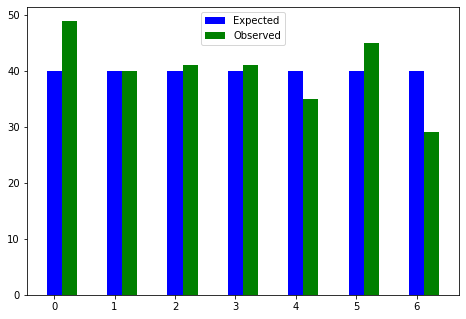

In [88]:
# chi-square hypothesis testing for one categorical variable
table_1 = [mon,tue,wed,thu,fri,sat,sun]
avg = (mon+tue+wed+thu+fri+sat+sun)/7
expected2 = [avg,avg,avg,avg,avg,avg,avg]
print(expected2)
print(ls_score)
X = np.arange(7)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(X + 0.00, expected2, color = 'b', width = 0.25)
ax.bar(X + 0.25, ls_score, color = 'g', width = 0.25)
ax.legend(labels=['Expected', 'Observed'])

stats.chisquare(f_obs=ls_score, f_exp=expected2)



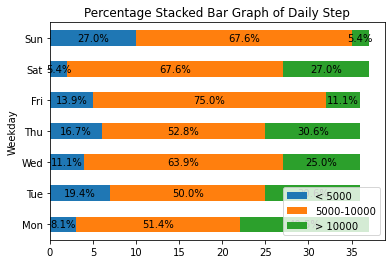

In [120]:
products_list = [mon_ls,tue_ls,wed_ls,thu_ls,fri_ls,sat_ls,sun_ls]
df = pd.DataFrame (products_list, columns = ['Weekday', '< 5000',"5000-10000","> 10000"])
df.plot(
  x = 'Weekday', 
  kind = 'barh', 
  stacked = True, 
  title = 'Percentage Stacked Bar Graph of Daily Step', 
  mark_right = True,
  legend = True)
  
df_total = df["< 5000"] + df["5000-10000"] + df["> 10000"]
df_rel = df[df.columns[1:]].div(df_total, 0)*100
  
for n in df_rel:
    for i, (cs, ab, pc) in enumerate(zip(df.iloc[:, 1:].cumsum(1)[n], 
                                         df[n], df_rel[n])):
        plt.text(cs - ab / 2, i, str(np.round(pc, 1)) + '%', 
                 va = 'center', ha = 'center')